In [1]:
!pip install imgaug

# Load and Augment an Image
* Source : https://nbviewer.jupyter.org/github/aleju/imgaug-doc/blob/master/notebooks/A01%20-%20Load%20and%20Augment%20an%20Image.ipynb


## Load and Show an Image


Original:


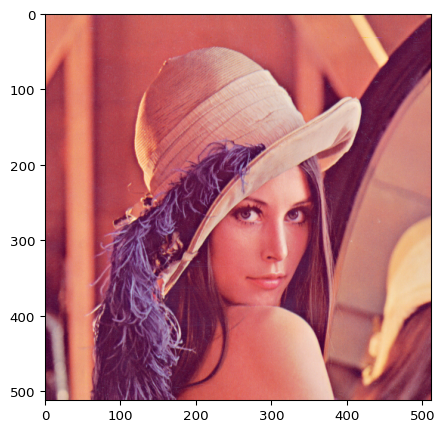

In [2]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")

print("Original:")
ia.imshow(image)

## Augment the Image


Augmented:


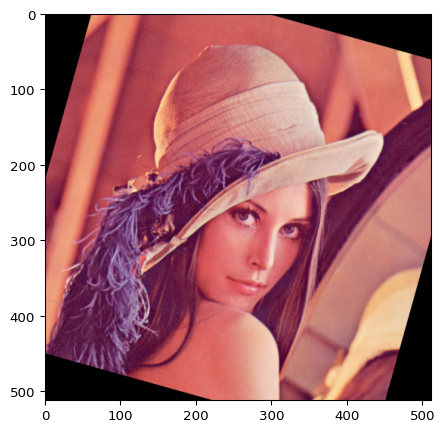

In [5]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

## Augment a Batch of Images


Augmented batch:


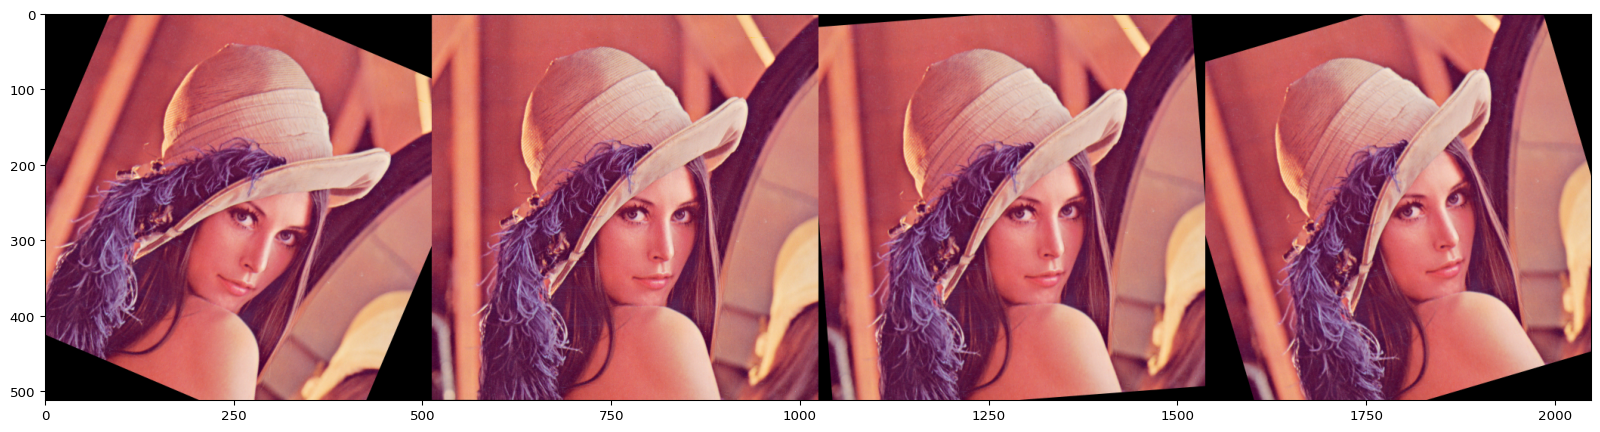

In [7]:
import numpy as np

images = [image, image, image, image]
images_aug = rotate(images=images)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

Augmented:


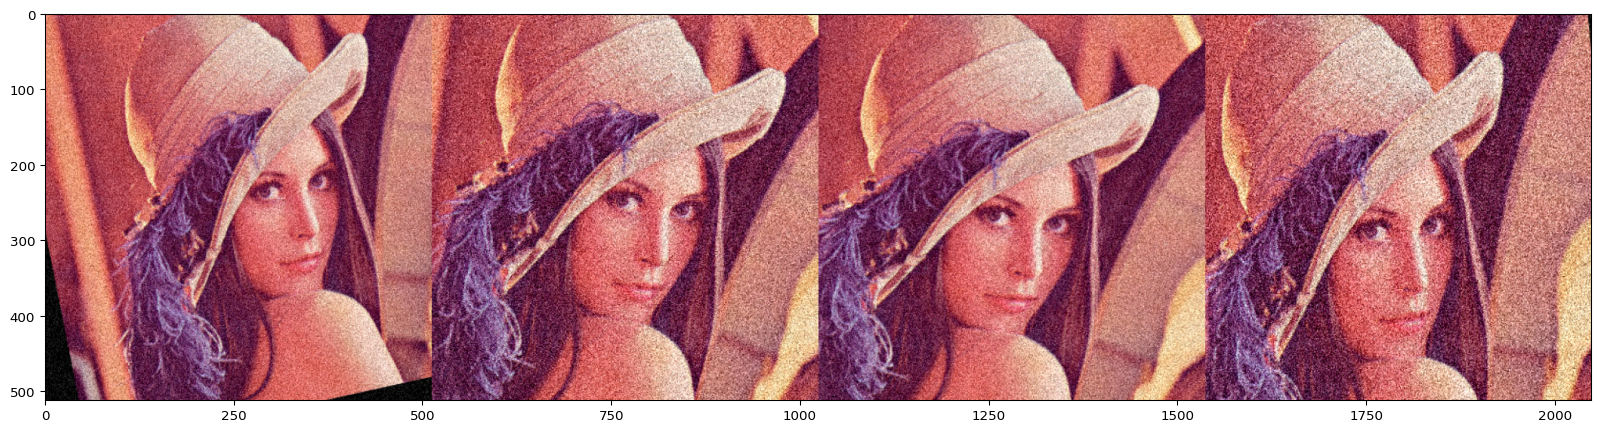

In [8]:
## Use Many Augmentation Techniques Simultaneously
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Crop(percent=(0, 0.2))
])

images_aug = seq(images=images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

In [9]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(30, 90)),
    iaa.Crop(percent=(0, 0.4))
], random_order=True)

images_aug = [seq(image=image) for _ in range(8)]

print("Augmented:")
ia.imshow(ia.draw_grid(images_aug, cols=4, rows=2))

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# __m="iaa";__k="out";print('\n'.join([_s for _s in dir(eval(__m)) if _s.find(__k) >= 0 ]))
?iaa.cutout

Object `iaa.cutout` not found.


Image 0 (input shape: (257, 286, 3), output shape: (257, 286, 3))


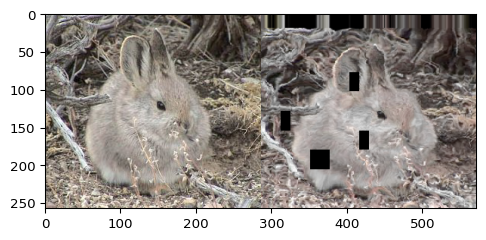

Image 1 (input shape: (536, 800, 3), output shape: (536, 800, 3))


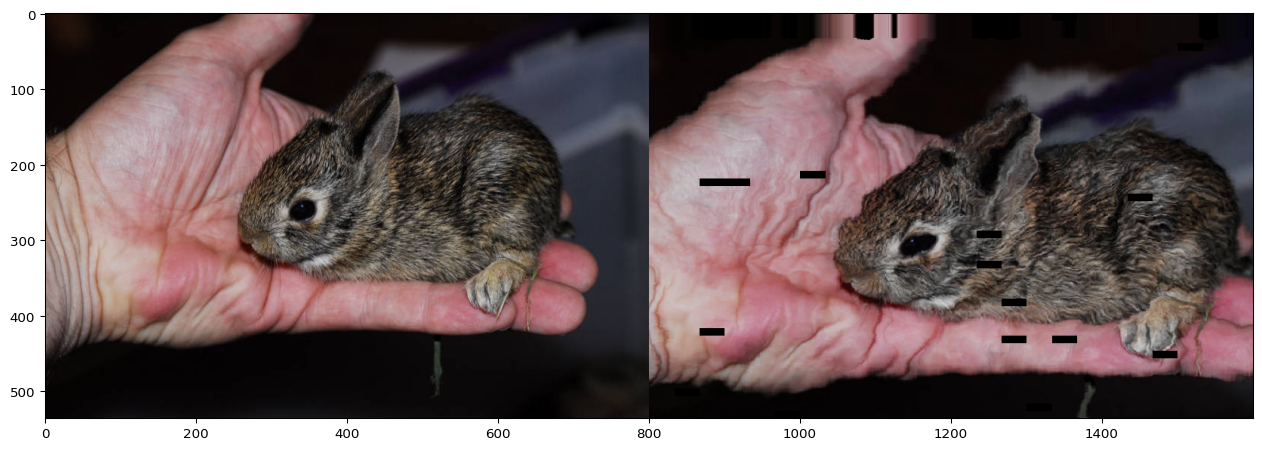

Image 2 (input shape: (289, 520, 3), output shape: (289, 520, 3))


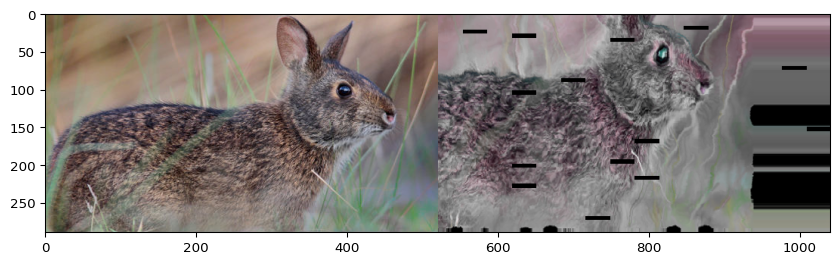

In [25]:
## Augmenting Images of Different Sizes
seq = iaa.Sequential([
    iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),  # crop and pad images
    iaa.AddToHueAndSaturation((-60, 60)),  # change their color
    iaa.ElasticTransformation(alpha=90, sigma=9),  # water-like effect
    iaa.CoarseDropout((0.0, 0.05), size_percent=(0.02, 0.25))  # replace one squared area within the image by a constant intensity value
], random_order=True)

# load images with different sizes
images_different_sizes = [
    imageio.imread("https://upload.wikimedia.org/wikipedia/commons/e/ed/BRACHYLAGUS_IDAHOENSIS.jpg"),
    imageio.imread("https://upload.wikimedia.org/wikipedia/commons/c/c9/Southern_swamp_rabbit_baby.jpg"),
    imageio.imread("https://upload.wikimedia.org/wikipedia/commons/9/9f/Lower_Keys_marsh_rabbit.jpg")
]

# augment them as one batch
images_aug = seq(images=images_different_sizes)

# visualize the results
print("Image 0 (input shape: %s, output shape: %s)" % (images_different_sizes[0].shape, images_aug[0].shape))
ia.imshow(np.hstack([images_different_sizes[0], images_aug[0]]))

print("Image 1 (input shape: %s, output shape: %s)" % (images_different_sizes[1].shape, images_aug[1].shape))
ia.imshow(np.hstack([images_different_sizes[1], images_aug[1]]))

print("Image 2 (input shape: %s, output shape: %s)" % (images_different_sizes[2].shape, images_aug[2].shape))
ia.imshow(np.hstack([images_different_sizes[2], images_aug[2]]))

# Basic Example
* https://imgaug.readthedocs.io/en/latest/source/examples_basics.html